# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Albert Kabore

Link to GitHub: https://github.com/albertokabore/Albert_Final_Module_7_article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [439]:
# Import and test necessary packages

from collections import Counter
import json
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob


!pip list

print('All prereqs installed.')

Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
fonttools          4.55.0
idna               3.10
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murm

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

Retrieve and Save the HTML Content: Utilize Python to fetch the article's HTML content and save it to a file. Here's how:

In [440]:

# URL of the NIH article on Type 2 Diabetes
url = 'https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes'

# Send a GET request to fetch the HTML content
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Save the HTML content to a file
with open('type_2_diabetes_article.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

print("HTML content saved to 'type_2_diabetes_article.html'")

HTML content saved to 'type_2_diabetes_article.html'


Parse and Extract Text from the HTML: After saving the HTML, use BeautifulSoup to parse and extract the main text content:

In [441]:

# Load the saved HTML file
with open('type_2_diabetes_article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract text from specific HTML elements (e.g., paragraphs)
article_text = ''
for paragraph in soup.find_all('p'):
    article_text += paragraph.get_text() + '\n'

# Save the extracted text to a new file
with open('type_2_diabetes_article.txt', 'w', encoding='utf-8') as file:
    file.write(article_text)

print("Extracted text saved to 'type_2_diabetes_article.txt'")


Extracted text saved to 'type_2_diabetes_article.txt'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [442]:
# Step 1: Fetch the HTML content from the URL
url = 'https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes'
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
html_content = response.text

# Step 2: Save the HTML content to a file
file_path = 'type_2_diabetes_article.html'
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"HTML content saved to '{file_path}'")

# Step 3: Parse the HTML and extract the text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Print the extracted article content
print("\nExtracted Article Text:\n")
print(article_text)

# Step 4: Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Perform sentiment analysis on the text
doc = nlp(article_text)
polarity = doc._.blob.polarity

# Determine the sentiment label
if polarity > 0:
    sentiment_label = "Positive"
elif polarity < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

# Print the polarity score with an appropriate label
print(f"\nPolarity score: {polarity:.2f} ({sentiment_label})")

# Count the number of sentences in the text
num_sentences = len(list(doc.sents))
print(f"Number of sentences in the article: {num_sentences}")


HTML content saved to 'type_2_diabetes_article.html'

Extracted Article Text:







Type 2 Diabetes - NIDDK












































Skip to main content










An official website of the United States government
Here’s how you know


Here’s how you know





Official government website icon


Official websites use .gov

                        A .gov website belongs to an official government organization in the United States.
                    



icon-https


Secure .gov websites use HTTPS

                        A lock (
                        

Lock
Locked padlock icon



                        ) or https:// means you’ve safely connected to the .gov website. Share sensitive information only on official, secure websites.
                    


















Search
Menu



Search for Information from NIDDK




Entire Site
Research & Funding
Health Information
News
About NIDDK



Search








Home







Research & Funding
Expand Research & Funding






3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [443]:

# Process the article text
doc = nlp(article_text)

# Step 4: Tokenize, normalize to lowercase, and count frequencies
tokens = [token.text.lower() for token in doc if token.is_alpha]  # Only consider alphabetic tokens
token_frequencies = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_frequencies.most_common(5)

# Step 5: Print the results
print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
    print(f"Token: {token}, Frequency: {frequency}")

5 Most Frequent Tokens:
Token: diabetes, Frequency: 78
Token: type, Frequency: 40
Token: you, Frequency: 37
Token: to, Frequency: 32
Token: of, Frequency: 31


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [444]:

# Process the article text
doc = nlp(article_text)

# Step 4: Extract lemmas, normalize to lowercase, and count frequencies
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]  # Only consider alphabetic tokens
lemma_frequencies = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Step 5: Print the results
print("5 Most Frequent Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {frequency}")


5 Most Frequent Lemmas:
Lemma: diabetes, Frequency: 48
Lemma: be, Frequency: 42
Lemma: type, Frequency: 41
Lemma: you, Frequency: 37
Lemma: to, Frequency: 32


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

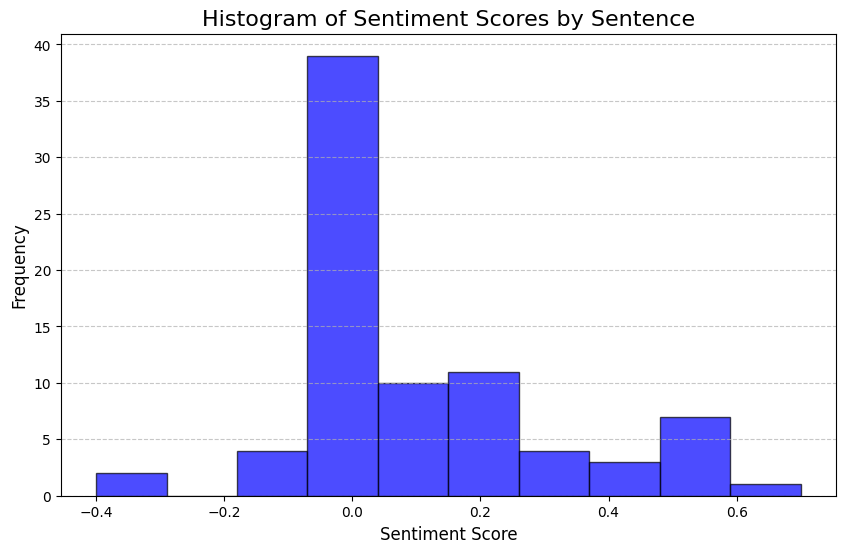

In [445]:

# Step 4: Calculate sentiment scores for each sentence
sentence_scores = [sent._.blob.polarity for sent in doc.sents]

# Step 5: Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentiment Scores by Sentence', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment: From the histogram, the most common range of scores appears to be around 0.0,
# indicating that most sentences in the article are neutral in sentiment.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

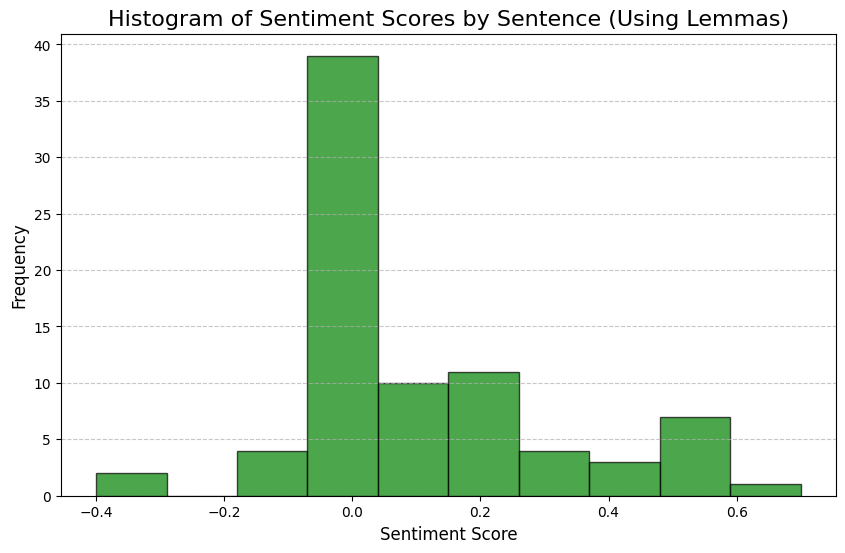

In [446]:


# Step 5: Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sentiment Scores by Sentence (Using Lemmas)', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Comment: From the histogram, the most common range of scores appears to be around 0.0,
# indicating that most sentences in the article are neutral in sentiment.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

Cutoff Score (tokens): 0.00
Cutoff Score (lemmas): 0.00


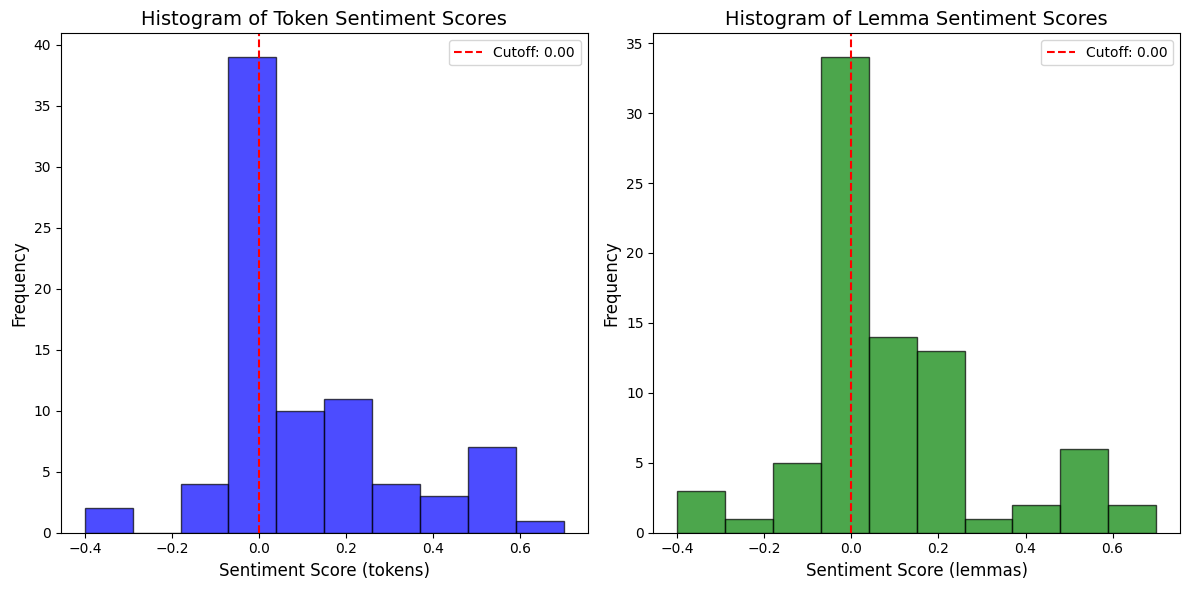

In [447]:

# Step 4: Calculate sentiment scores for tokens and lemmas
token_scores = [sent._.blob.polarity for sent in doc.sents]

lemma_scores = []
for sent in doc.sents:
    lemmas = [token.lemma_.lower() for token in sent if token.is_alpha]
    lemma_sentence = " ".join(lemmas)
    lemma_doc = nlp(lemma_sentence)
    lemma_scores.append(lemma_doc._.blob.polarity)

# Step 5: Determine cutoff scores
token_cutoff = np.percentile(token_scores, 50)  # Median value
lemma_cutoff = np.percentile(lemma_scores, 50)  # Median value

# Step 6: Print cutoff scores
print(f"Cutoff Score (tokens): {token_cutoff:.2f}")
print(f"Cutoff Score (lemmas): {lemma_cutoff:.2f}")

# Step 7: Plot histograms for visualization
plt.figure(figsize=(12, 6))

# Token Scores Histogram
plt.subplot(1, 2, 1)
plt.hist(token_scores, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(token_cutoff, color='red', linestyle='--', label=f"Cutoff: {token_cutoff:.2f}")
plt.title('Histogram of Token Sentiment Scores', fontsize=14)
plt.xlabel('Sentiment Score (tokens)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Lemma Scores Histogram
plt.subplot(1, 2, 2)
plt.hist(lemma_scores, bins=10, color='green', alpha=0.7, edgecolor='black')
plt.axvline(lemma_cutoff, color='red', linestyle='--', label=f"Cutoff: {lemma_cutoff:.2f}")
plt.title('Histogram of Lemma Sentiment Scores', fontsize=14)
plt.xlabel('Sentiment Score (lemmas)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [450]:



# Step 4: Calculate sentiment scores for tokens
token_scores = [sent._.blob.polarity for sent in doc.sents]

# Step 5: Determine the cutoff score (median value)
token_cutoff = np.percentile(token_scores, 50)  # Median value

# Step 6: Generate a summary based on the cutoff score
summary_sentences = [sent.text.strip() for sent, score in zip(doc.sents, token_scores) if score > token_cutoff]

# Combine sentences into a single summary text
summary_text = ' '.join(summary_sentences)

# Step 7: Print the summary
print("Article Summary:")
print(summary_text)


Article Summary:
Type 2 Diabetes - NIDDK












































Skip to main content icon-https


Secure .gov websites use HTTPS

                        A lock (
                        

Lock
Locked padlock icon



                        ) or https:// means you’ve safely connected to the .gov website. Share sensitive information only on official, secure websites. Search
Menu



Search for Information from NIDDK




Entire Site
Research & Funding
Health Information
News
About NIDDK



Search








Home







Research & Funding
Expand Research & Funding




Current Funding Opportunities
Research Programs & Contacts
Human Subjects Research
Funding Process


Research Training & Career Development
Funded Grants & Grant History
Research Resources


Research at NIDDK
Technology Advancement & Transfer
Meetings & Workshops







Health Information
Expand Health Information




Health Topics
Diabetes
Digestive Diseases
Kidney Disease
Weight Management
Liver Disease
Ur

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?